<a href="https://colab.research.google.com/github/urvog/incomesalary/blob/main/Unidad_II_Tema_15_Random_Forest%2C_XGBoost%2C_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema 15,16 ALGORITMOS BAGGING, BOOSTING, NEURAL NETWORKS

<img src="https://www.neuraldojo.org/media/forest4.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>
     
##Ingresos $ de personas adultas

**Objetivo**
Predecir si los ingresos exceden los $50K/año según los datos del censo. También conocido como conjunto de datos de "Ingresos del censo".

>50K, <=50K.

Columnas:
- age: edad (continuous)
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, - State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## 1.- Importando los datos

In [1]:
!wget https://neuraldojo.org/media/income/income.csv

--2022-03-09 10:16:05--  https://neuraldojo.org/media/income/income.csv
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4578867 (4.4M) [text/csv]
Saving to: ‘income.csv’

income.csv          100%[===================>]   4.37M  4.70MB/s    in 0.9s    

2022-03-09 10:16:07 (4.70 MB/s) - ‘income.csv’ saved [4578867/4578867]



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_income = pd.read_csv('income.csv')

In [4]:
df_income.shape

(43957, 15)

##2.- Analysis Exploratorio de Datos (EDA)

In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
df_income.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [7]:
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [8]:
#Verificamos la distribución de nuestra variable objetivo
df_income['income_>50K'].value_counts()

0    33439
1    10518
Name: income_>50K, dtype: int64

### 2.1 Analisis Univariable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


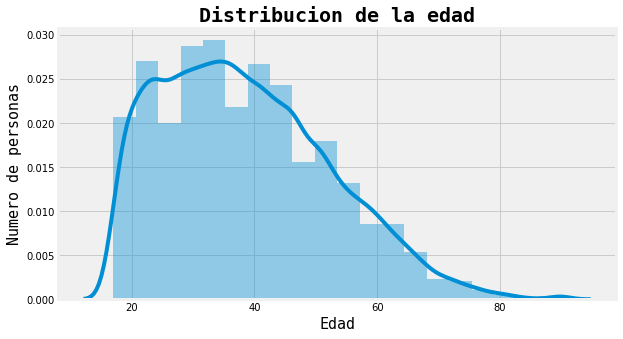

In [9]:
# Distribucion de la Edad
age = df_income['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_income['age'], bins=20)
plt.title('Distribucion de la edad', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Edad', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


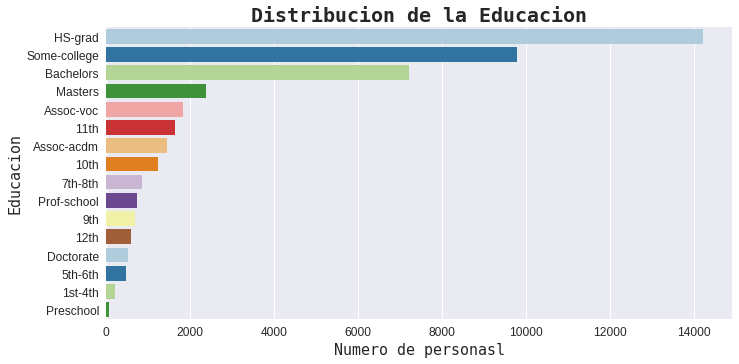

In [10]:
# Distribucion de la educacion
edu = df_income['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribucion de la Educacion', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Numero de personasl', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Educacion', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


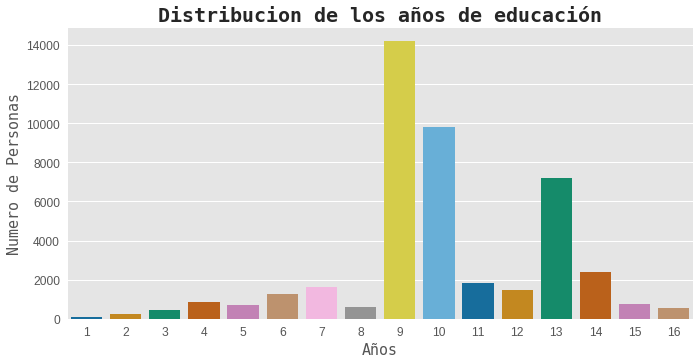

In [11]:
# Distribuion de los años de educación
edu_num = df_income['educational-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribucion de los años de educación', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Años', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de Personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

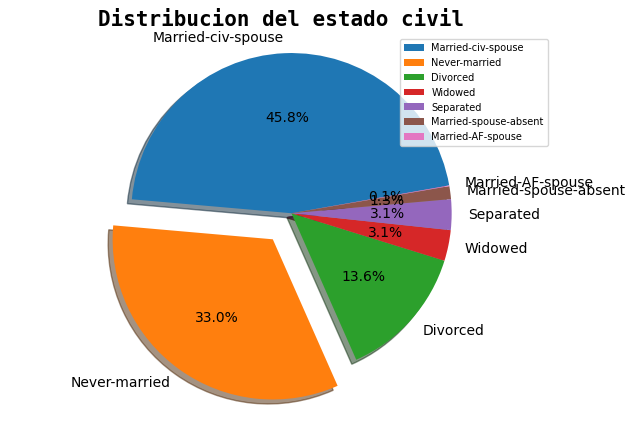

In [12]:
# Una torta de distribucion del estado scivil
marital = df_income['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Distribucion del estado civil', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

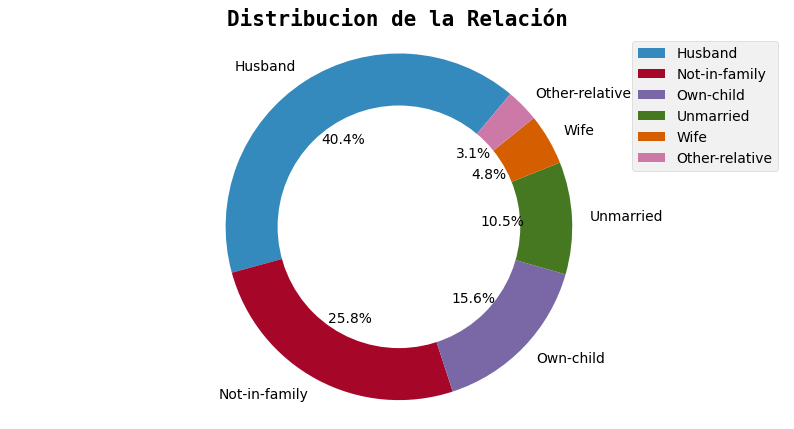

In [13]:
# Dibujemos un dona del tipo de relación
relation = df_income['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(10, 5))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribucion de la Relación', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 10})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


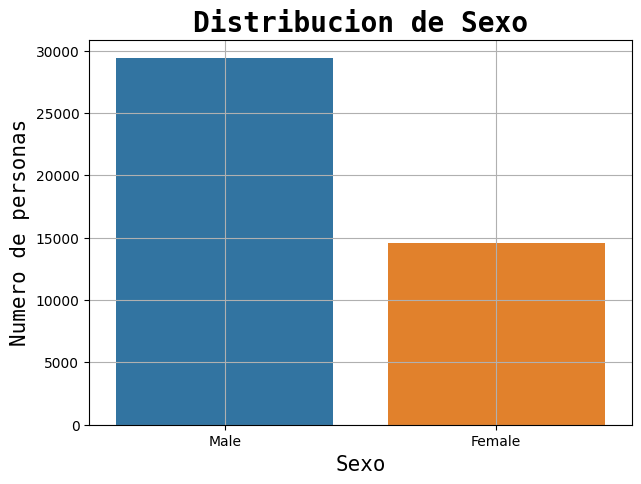

In [14]:
# Distribucion del Sexo
sex = df_income['gender'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribucion de Sexo', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sexo', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

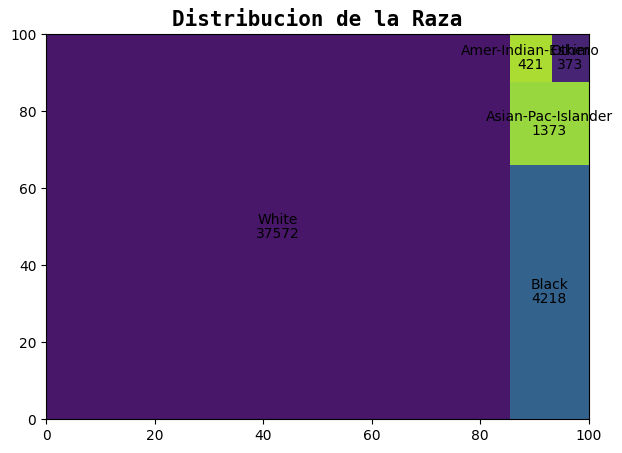

In [15]:
# Creando un mapa de arbol para la razas
!pip install squarify
import squarify
race = df_income['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Distribucion de la Raza', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


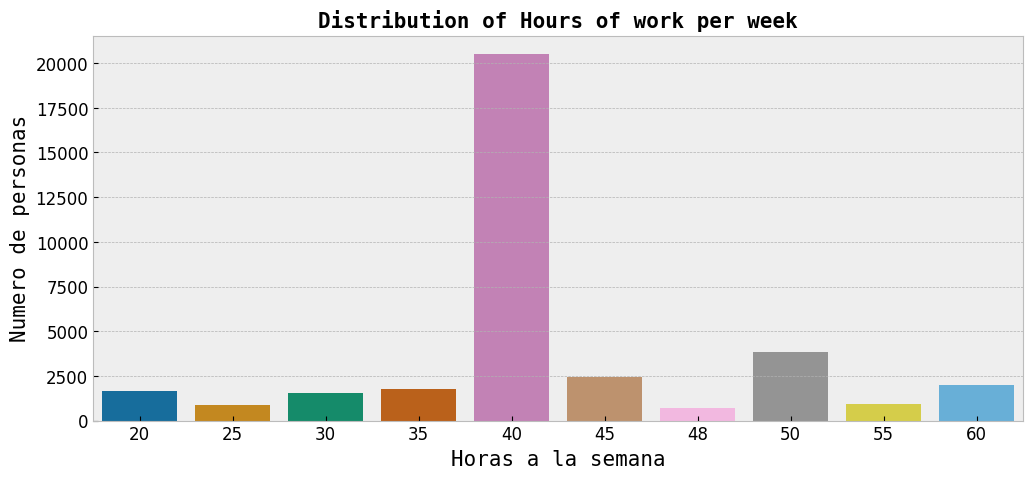

In [16]:
# Creando una distribución de las horas por semana
hours = df_income['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(12, 5))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Horas a la semana', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

###2.2 Analisis Bi-variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


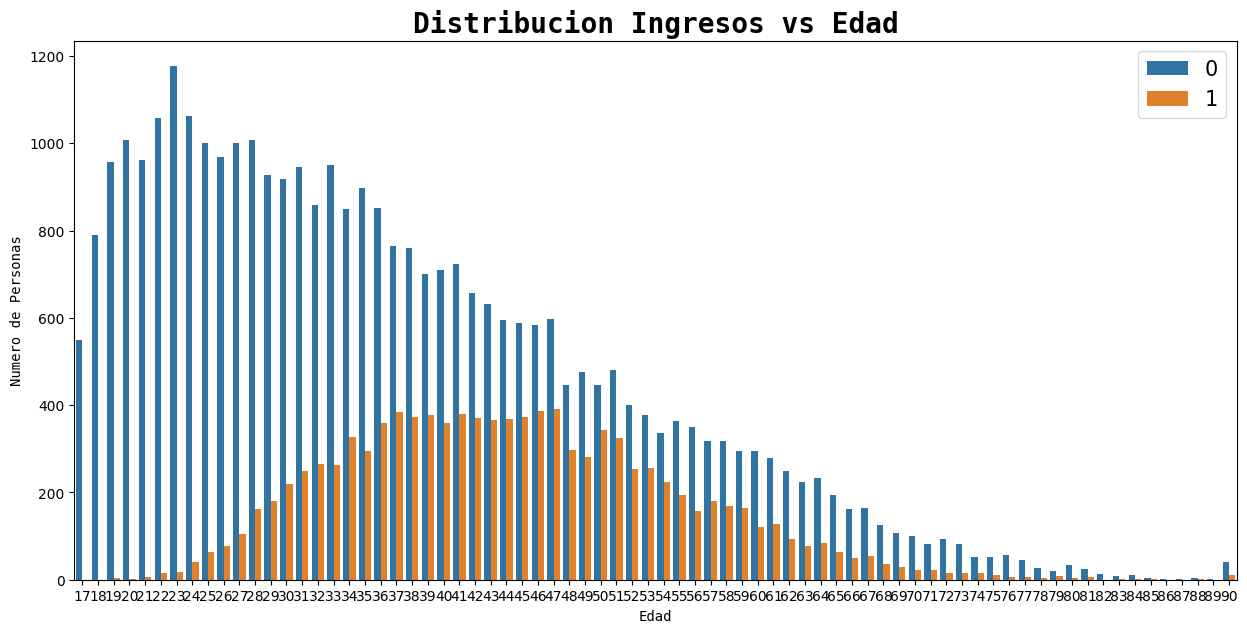

In [17]:
# Ingresos vs Edad
plt.style.use('default')
plt.figure(figsize=(15, 7))
sns.countplot(df_income['age'], hue=df_income['income_>50K'])
plt.title('Distribucion Ingresos vs Edad', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Edad', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Numero de Personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


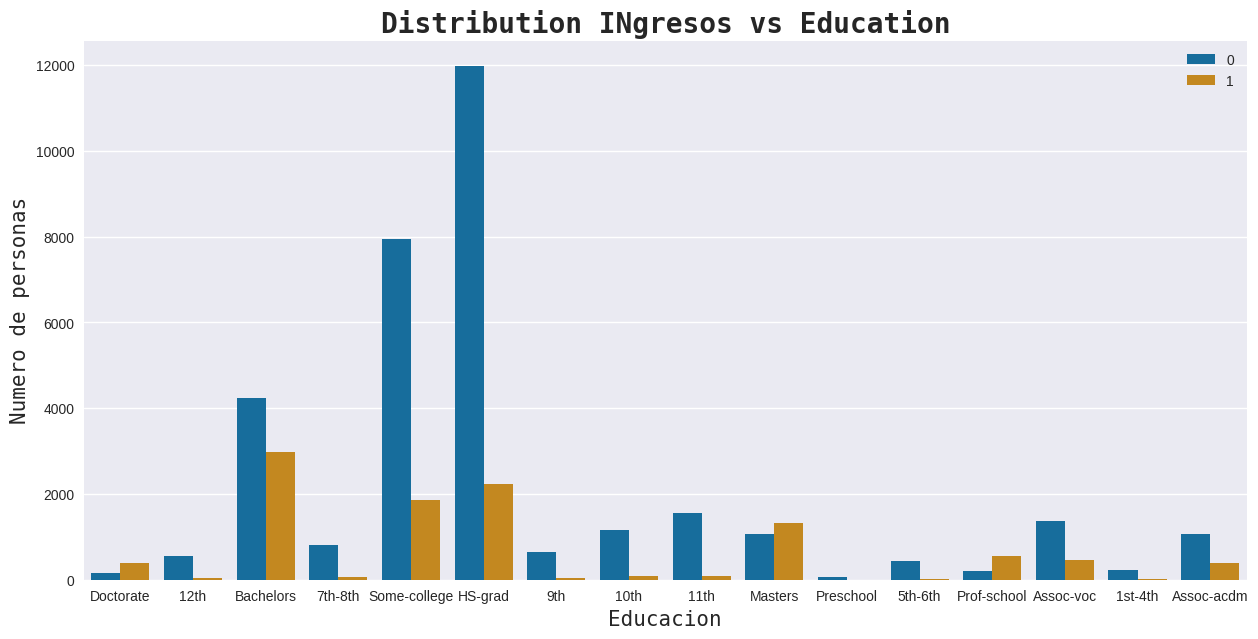

In [18]:
# Ingresos vs Edacacion
plt.style.use('seaborn')
plt.figure(figsize=(15, 7))
sns.countplot(df_income['education'],
              hue=df_income['income_>50K'], palette='colorblind')
plt.title('Distribution INgresos vs Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Educacion', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 10})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


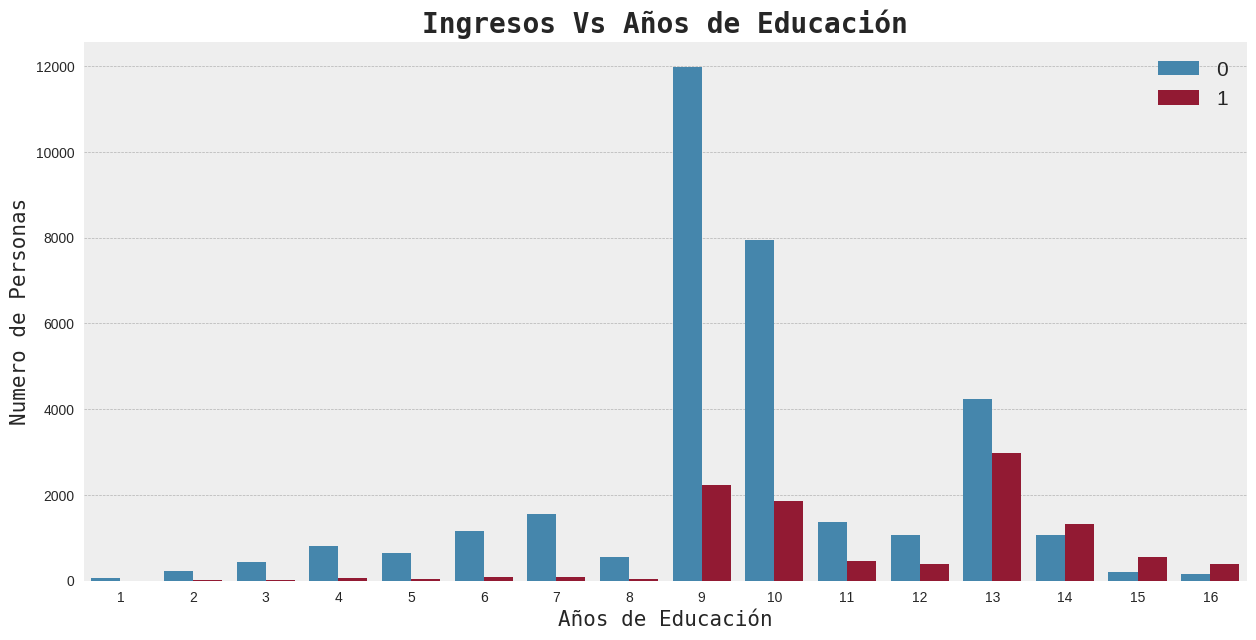

In [19]:
# Ingresos vs Años de Educación
plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.countplot(df_income['educational-num'],
              hue=df_income['income_>50K'])
plt.title('Ingresos Vs Años de Educación', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Años de Educación', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de Personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


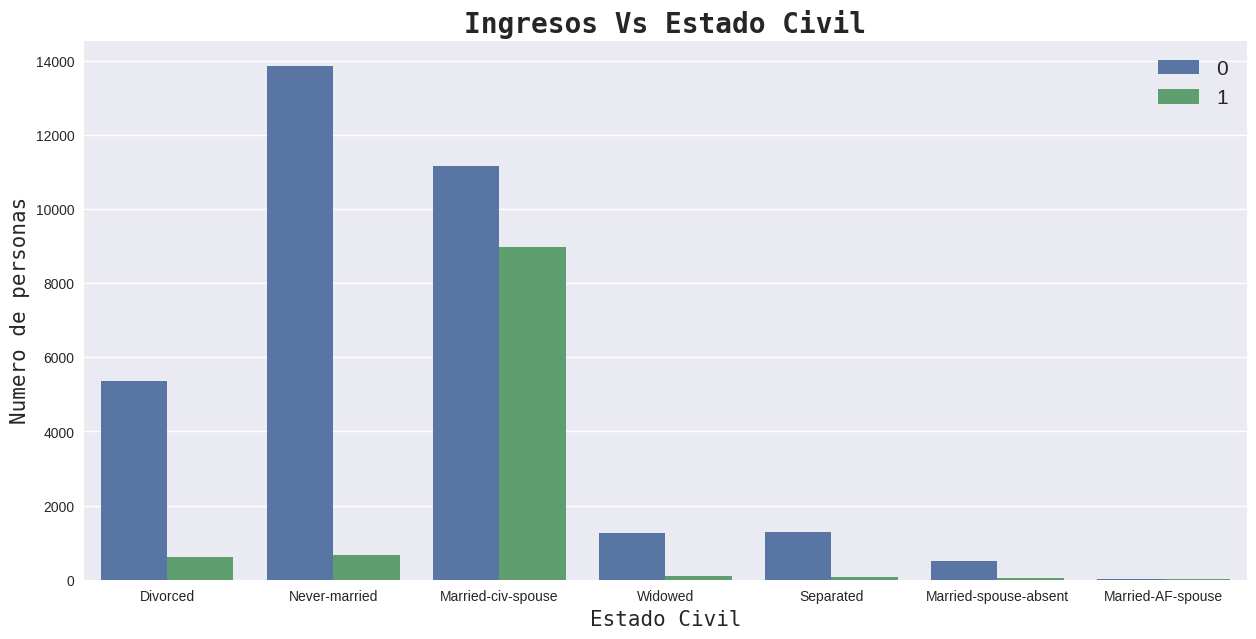

In [20]:
# Ingresos vs Estado Civil
plt.style.use('seaborn')
plt.figure(figsize=(15, 7))
sns.countplot(df_income['marital-status'], hue=df_income['income_>50K'])
plt.title('Ingresos Vs Estado Civil', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Estado Civil', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


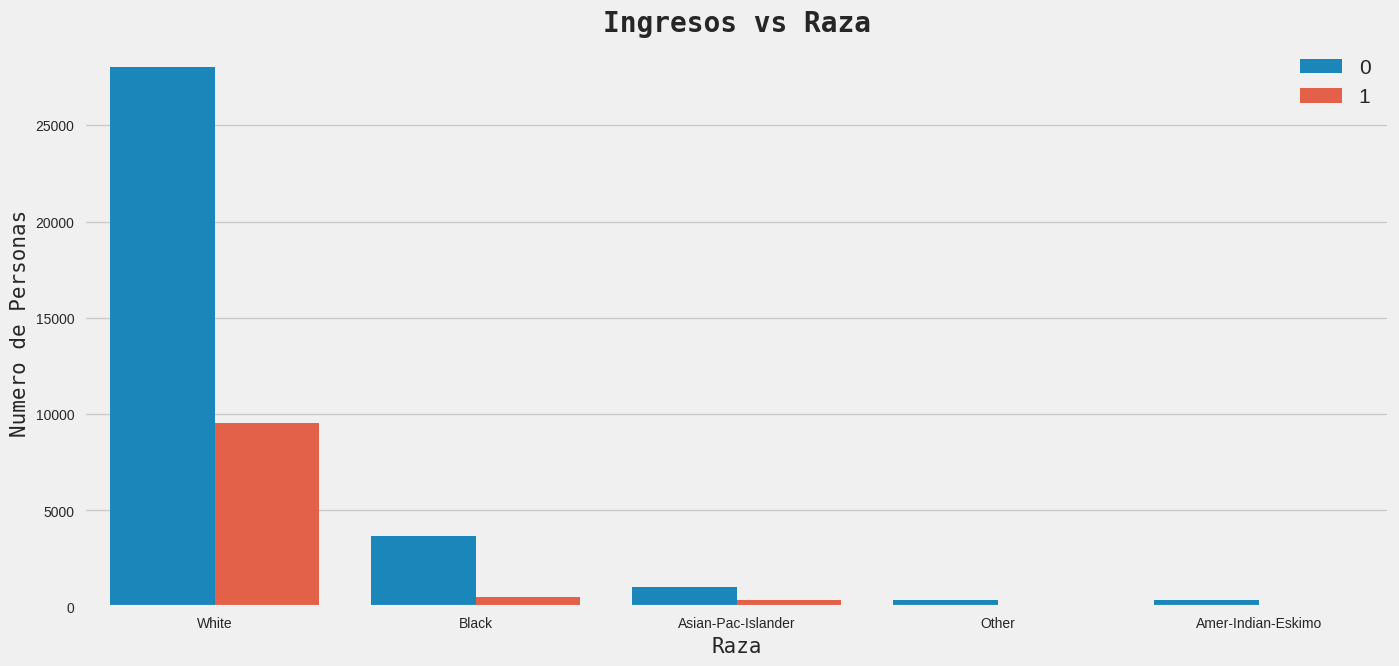

In [21]:
# Ingresos vs Raza
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7))
sns.countplot(df_income['race'], hue=df_income['income_>50K'])
plt.title('Ingresos vs Raza', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Raza', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de Personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


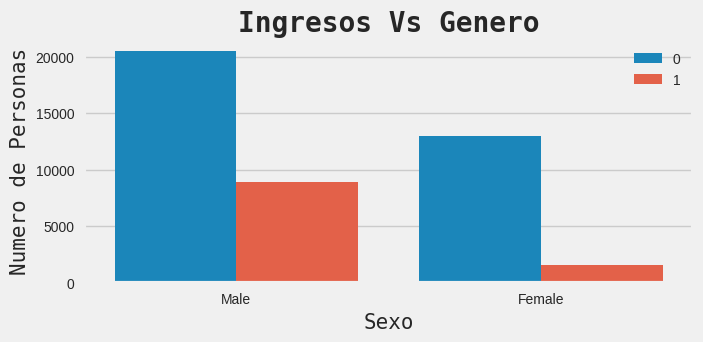

In [22]:
# Ingresos vs Genero
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df_income['gender'], hue=df_income['income_>50K'])
plt.title('Ingresos Vs Genero', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sexo', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Numero de Personas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 10})
plt.show()

###2.3 Analisis Multivariable


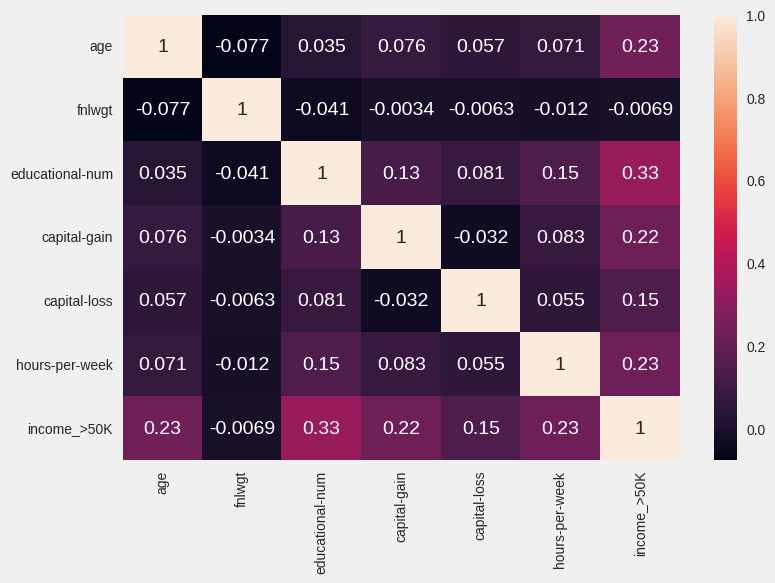

In [23]:
#Mapa de calor de correlaciones
sns.heatmap(df_income.corr(), annot= True)

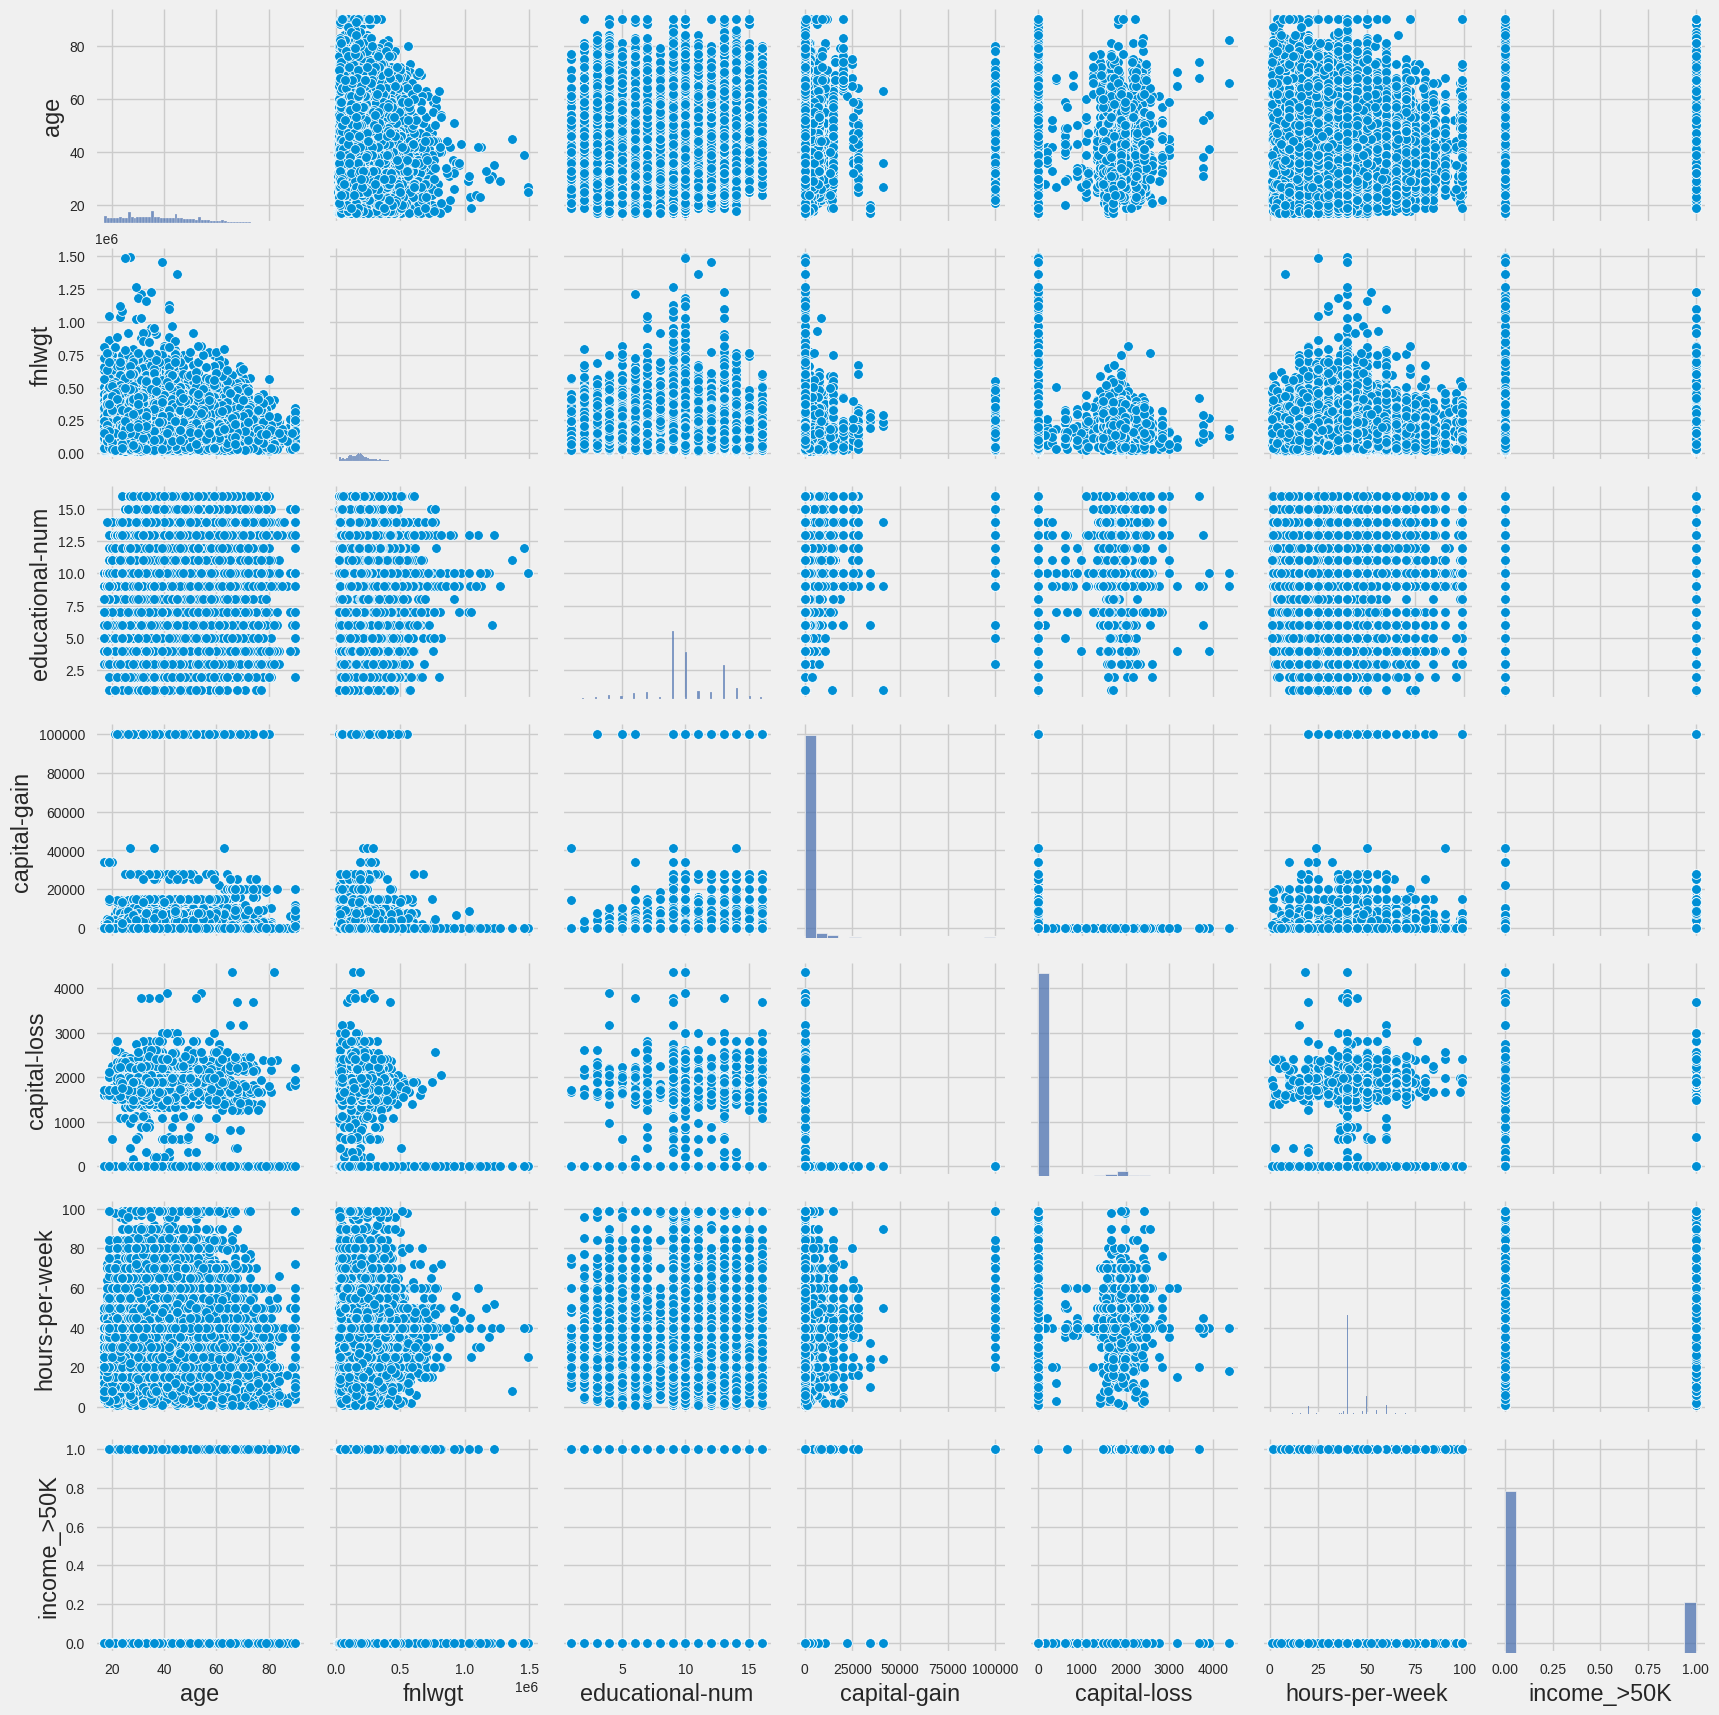

In [24]:
#Pairplot
sns.pairplot(df_income)

### 2.3 Manipulacion de los datos

In [25]:
#Label Encoder
#A diferencia del método get_dummies(), label encoder convierte las columnas categoricas en valor númerico
from sklearn.preprocessing import LabelEncoder

for col in df_income.columns:
    if df_income[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_income[col] = encoder.fit_transform(df_income[col])

In [26]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,3,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,3,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,3,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,6,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,6,149248,15,10,4,7,1,2,1,0,0,40,38,0


In [27]:
#Dividimos nuestros datos para entrenar el modelo (Train, Validation) y para Test
df_train_ = df_income.sample(frac= .80)
df_test = df_income.drop(df_train_.index)

In [28]:
#Dividimos nuesros datos train, validation and test
X = df_train_.drop('income_>50K', axis = 1)
y = df_train_['income_>50K']

X_test = df_test.drop('income_>50K', axis = 1)
y_test = df_test['income_>50K']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)


#Random Forest

##3.- Modelado ML

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

##4.- Evaluamos

In [30]:
#Imprimimos Scores
print("Train Score:", clf_rf.score(X_train,y_train))
print("Validation Score:", clf_rf.score(X_valid,y_valid))
print("Test Score:", clf_rf.score(X_test,y_test))

Train Score: 0.9998781280467989
Validation Score: 0.8566824644549763
Test Score: 0.8607666932089637


##5.- Ajustamos Parametros

- n_estimators: número de árboles que construye el algoritmo antes de promediar las predicciones.

- max_features: número máximo de características que el bosque aleatorio considera dividir un nodo.

- min_sample_leaf: determina el número mínimo de hojas necesarias para dividir un nodo interno.

In [31]:
clf_rf_ = RandomForestClassifier(random_state = 0, max_depth=20,n_estimators=100)
clf_rf_.fit(X_train, y_train)

#Imprimimos Scores
print("Train Score:", clf_rf_.score(X_train,y_train))
print("Validation Score:", clf_rf_.score(X_valid,y_valid))
print("Test Score:", clf_rf_.score(X_test,y_test))

Train Score: 0.9565323366915827
Validation Score: 0.8685308056872038
Test Score: 0.8654305539756569


###5.1 Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV
clf_rf_ = RandomForestClassifier(random_state = 0)
model_params = {
    'max_depth': [5,10,15,20,50],
    'n_estimators':[100,200,300],
    'min_samples_split': [5,10,20],
}

clf_grid = GridSearchCV(clf_rf_,model_params, cv = 3, verbose=10)
clf_grid.fit(X_train,y_train)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3; 1/45] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 1/3; 1/45] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.848 total time=   0.7s
[CV 2/3; 1/45] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 2/3; 1/45] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.848 total time=   0.7s
[CV 3/3; 1/45] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 3/3; 1/45] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.849 total time=   0.7s
[CV 1/3; 2/45] START max_depth=5, min_samples_split=5, n_estimators=200.........
[CV 1/3; 2/45] END max_depth=5, min_samples_split=5, n_estimators=200;, score=0.848 total time=   1.4s
[CV 2/3; 2/45] START max_depth=5, min_samples_split=5, n_estimators=200.........
[CV 2/3; 2/45] END max_depth=5, min_samples_split=5, n_estimators=200;, score=0.846 total time=   1.4s
[CV 3/3; 2/45] STA

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [33]:
print(clf_grid.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf_rf_best = RandomForestClassifier(criterion ='gini', max_depth = 20, max_features='auto', min_samples_leaf=1, min_samples_split = 20, n_estimators = 200)
clf_rf_best.fit(X_train,y_train)

#Imprimimos Scores Acuracy
print("Train Score Grid Search (Accuracy):", clf_rf_best.score(X_train,y_train))
print("Validation Grid Search Score (Accuracy):", clf_rf_best.score(X_valid,y_valid))
print("Test Score Grid Search (Accuracy):", clf_rf_best.score(X_test,y_test))

#Imprimimos Scores F1-Score
y_pred_val = clf_rf_best.predict(X_valid)
y_pred_test = clf_rf_best.predict(X_test)
#f1_score(Y_test, Y_pred_log_reg))

print("Validation Grid Search Score (F1-Score):", f1_score(y_valid,y_pred_val))
print("Test Grid Search Score(F1-Score):", f1_score(y_test,y_pred_test))

Train Score Grid Search (Accuracy): 0.9022586935326616
Validation Grid Search Score (Accuracy): 0.8717535545023697
Test Score Grid Search (Accuracy): 0.8694118985325902
Validation Grid Search Score (F1-Score): 0.6975184439973172
Test Grid Search Score(F1-Score): 0.6964569011105235


#XGBoost

<img src="https://www.neuraldojo.org/media/boost3.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

##3.- Modelado ML

In [35]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(random_state = 0)
clf_xgb.fit(X_train, y_train)

XGBClassifier()

##4.- Evaluamos

In [36]:
print("Train Score:", clf_xgb.score(X_train,y_train))
print("Validation Score:", clf_xgb.score(X_valid,y_valid))
print("Test Score:", clf_xgb.score(X_test,y_test))

Train Score: 0.865940851478713
Validation Score: 0.8704265402843602
Test Score: 0.8649755431691503


##5.- Ajustamos Parámetros

In [37]:
#Creamos nuestro modelo basico
clf_xgb_ = XGBClassifier(random_state = 0)

#imprimimos los parametros disponibles
clf_xgb_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [38]:
model_params = {
    'learning_rate': [0.05,0.1],
    'max_depth': [5,10,15],
    'n_estimators':[100,200]
}
clf_grid_xgb = GridSearchCV(clf_xgb_,model_params, cv = 5, verbose=10)
clf_grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START learning_rate=0.05, max_depth=5, n_estimators=100..........
[CV 1/5; 1/12] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.865 total time=   1.5s
[CV 2/5; 1/12] START learning_rate=0.05, max_depth=5, n_estimators=100..........
[CV 2/5; 1/12] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.858 total time=   1.5s
[CV 3/5; 1/12] START learning_rate=0.05, max_depth=5, n_estimators=100..........
[CV 3/5; 1/12] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.862 total time=   1.5s
[CV 4/5; 1/12] START learning_rate=0.05, max_depth=5, n_estimators=100..........
[CV 4/5; 1/12] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.866 total time=   1.5s
[CV 5/5; 1/12] START learning_rate=0.05, max_depth=5, n_estimators=100..........
[CV 5/5; 1/12] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.863 total time=   1.5s
[CV 1/5; 2/12] START lea

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200]},
             verbose=10)

In [39]:
print(clf_grid_xgb.best_estimator_.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [40]:
clf_xgb_best = XGBClassifier(random_state = 0, max_depth = 5, n_estimators = 200)
clf_xgb_best.fit(X_train,y_train)

#Imprimimos Scores Acuracy
print("Train Score Grid Search (Accuracy):", clf_xgb_best.score(X_train,y_train))
print("Validation Grid Search Score (Accuracy):", clf_xgb_best.score(X_valid,y_valid))
print("Test Score Grid Search (Accuracy):", clf_xgb_best.score(X_test,y_test))

#Imprimimos Scores F1-Score
y_pred_val = clf_xgb_best.predict(X_valid)
y_pred_test = clf_xgb_best.predict(X_test)
#f1_score(Y_test, Y_pred_log_reg))

print("Validation Grid Search Score (F1-Score):", f1_score(y_valid,y_pred_val))
print("Test Grid Search Score(F1-Score):", f1_score(y_test,y_pred_test))

Train Score Grid Search (Accuracy): 0.8906402339941502
Validation Grid Search Score (Accuracy): 0.8753554502369668
Test Score Grid Search (Accuracy): 0.8739620065976567
Validation Grid Search Score (F1-Score): 0.7139438764411572
Test Grid Search Score(F1-Score): 0.7147270854788879


# Neural Networks

<img src="https://www.neuraldojo.org/media/nn.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

In [41]:
#normalizamos los datos, en redes neuronales es recomendable realizar este paso de reescalado de los datos
from sklearn.preprocessing import MinMaxScaler

columns = X_train.columns

scaler = MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns = columns)
X_valid_norm = pd.DataFrame(scaler.fit_transform(X_valid), columns = columns)
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test), columns = columns)

X_train_norm.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.342466,0.125,0.110069,0.400000,0.266667,0.333333,0.500000,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829
1,0.164384,0.375,0.231640,0.800000,0.866667,0.666667,0.642857,0.2,1.0,0.0,0.0,0.0,0.397959,0.926829
2,0.246575,0.375,0.076253,0.600000,0.800000,0.333333,0.142857,0.0,1.0,1.0,0.0,0.0,0.500000,0.926829
3,0.438356,0.375,0.162012,1.000000,0.600000,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829
4,0.561644,0.625,0.206900,0.733333,0.533333,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829


##3.- Modeloado ML

In [42]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state = 0, hidden_layer_sizes = (100,50,20,10,5))
clf_nn.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 50, 20, 10, 5), random_state=0)

In [43]:
clf_nn.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50, 20, 10, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

##4.- Evaluamos

In [44]:
print("Train Score:", clf_nn.score(X_train,y_train))
print("Validation Score:", clf_nn.score(X_valid,y_valid))
print("Test Score:", clf_nn.score(X_test,y_test))

Train Score: 0.7675089372765681
Validation Score: 0.7691943127962085
Test Score: 0.764304402229553


##5.- Ajustamos parámetros

In [45]:
#Creamos nuestro modelo basico
clf_nn_ = MLPClassifier(random_state = 0)

#imprimimos los parametros disponibles
clf_nn_.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [46]:
clf_nn_ = MLPClassifier(random_state = 0)
model_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [47]:
clf_grid_nn = GridSearchCV(clf_nn_,model_params, cv = 5, verbose=10)
clf_grid_nn.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd
[CV 1/5; 1/48] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd;, score=0.769 total time=  19.3s
[CV 2/5; 1/48] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd
[CV 2/5; 1/48] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd;, score=0.768 total time=  21.4s
[CV 3/5; 1/48] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd
[CV 3/5; 1/48] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd;, score=0.769 total time=  13.7s
[CV 4/5; 1/48] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd
[CV 4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5; 29/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=  32.6s
[CV 2/5; 29/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 2/5; 29/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.0s
[CV 3/5; 29/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 3/5; 29/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.0s
[CV 4/5; 29/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 4/5; 29/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.0s
[CV 5/5; 29/48] START 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5; 31/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  32.1s
[CV 2/5; 31/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 2/5; 31/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  11.9s
[CV 3/5; 31/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 3/5; 31/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  10.9s
[CV 4/5; 31/48] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 4/5; 31/48] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  11.0s
[CV 5/5; 31/48] START 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5; 41/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=  32.6s
[CV 2/5; 41/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 2/5; 41/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.0s
[CV 3/5; 41/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 3/5; 41/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.1s
[CV 4/5; 41/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd
[CV 4/5; 41/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd;, score=0.761 total time=   2.1s
[CV 5/5; 41/48] START activation=rel

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5; 43/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  32.5s
[CV 2/5; 43/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 2/5; 43/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  11.3s
[CV 3/5; 43/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 3/5; 43/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  11.1s
[CV 4/5; 43/48] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd
[CV 4/5; 43/48] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd;, score=0.761 total time=  11.3s
[CV 5/5; 43/48] START activation=rel

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [48]:
clf_grid_nn.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [49]:
clf_nn_best = MLPClassifier()
clf_nn_best.fit(X_train,y_train)

#Imprimimos Scores Acuracy
print("Train Score Grid Search (Accuracy):", clf_nn_best.score(X_train,y_train))
print("Validation Grid Search Score (Accuracy):", clf_nn_best.score(X_valid,y_valid))
print("Test Score Grid Search (Accuracy):", clf_nn_best.score(X_test,y_test))

#Imprimimos Scores F1-Score
y_pred_val = clf_nn_best.predict(X_valid)
y_pred_test = clf_nn_best.predict(X_test)
#f1_score(Y_test, Y_pred_log_reg))

print("Validation Grid Search Score (F1-Score):", f1_score(y_valid,y_pred_val))
print("Test Grid Search Score(F1-Score):", f1_score(y_test,y_pred_test))

Train Score Grid Search (Accuracy): 0.782499187520312
Validation Grid Search Score (Accuracy): 0.7808530805687204
Test Score Grid Search (Accuracy): 0.7777272210214993
Validation Grid Search Score (F1-Score): 0.4188034188034188
Test Grid Search Score(F1-Score): 0.41144578313253016
